# Evaluating Regression Models

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [1]:
import pandas as pd
import numpy as np
import pydataset as pds

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
baseline = tips.tip.mean()
baseline

2.9982786885245902

In [4]:
tips['baseline'] = tips.tip.mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


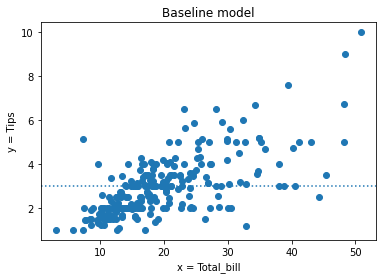

In [5]:
# data plotted with baseline
plt.scatter(tips.total_bill, tips.tip)
plt.axhline(tips.tip.mean(), ls = ':')
plt.xlabel('x = Total_bill')
plt.ylabel('y = Tips')
plt.title('Baseline model');

In [6]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(tips[['total_bill']], tips.tip)

# make prediction
tips['yhat'] = lm.predict(tips[['total_bill']])
# you would use the train dataset after splitting


tips

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


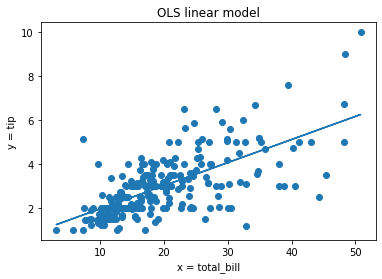

In [7]:
# plotted data with regression line (prediction line)
plt.scatter(tips.total_bill, tips.tip)
plt.plot(tips.total_bill, tips.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('OLS linear model');

In [8]:
from sklearn.linear_model import LinearRegression

x = tips[["total_bill"]]
y = tips[["tip"]]

# assuming X and y are already defined
model = LinearRegression().fit(x, y)
predictions = model.predict(x)

3. Plot the residuals for the linear regression model that you made.

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [10]:
# residual = actual - predicted
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline

In [11]:
tips

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131,1.950869,2.921721
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836,-1.774836,-0.998279
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175,-1.301175,-0.998279
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807,-1.041807,-1.248279


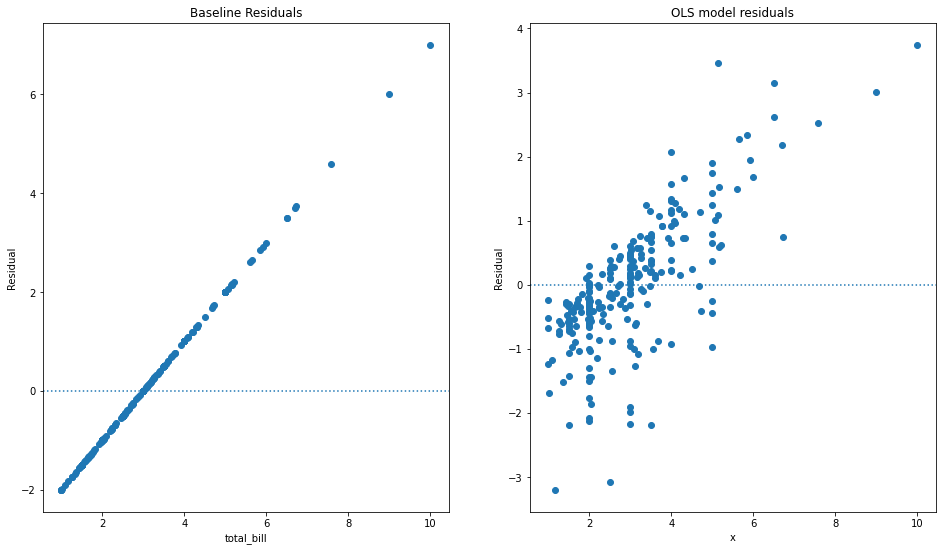

In [24]:
# residual plots (x vs residual)

plt.figure(figsize = (16,9))

plt.subplot(121)
plt.scatter(tips.tip, tips.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips.tip, tips.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [13]:
tips.residual.sum()

7.460698725481052e-14

In [14]:
tips.baseline_residual.sum()


-2.4868995751603507e-14

In [15]:
tips['residual^2'] = tips.residual**2
tips['baseline_residual^2'] = tips.baseline_residual**2
tips

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131,1.950869,2.921721,3.805888,8.536455
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836,-1.774836,-0.998279,3.150043,0.996560
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175,-1.301175,-0.998279,1.693057,0.996560
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807,-1.041807,-1.248279,1.085361,1.558200


### SSE (Sum of Squared Errors)
sum the squared of residuals

In [16]:
SSE = tips['residual^2'].sum()
SSE_baseline = tips['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))


SSE = 252.8
SSE Baseline = 465.2


### MSE (Mean Squared Error)
average of SSE = SSE/(no. of data points)

the average of your errors that have each been squared

In [17]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  1.0
MSE baseline =  1.9


### RMSE (Root Mean Squared Error)
Square root of MSE
Same units as the output (y) variable

In [18]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  1.0
RMSE baseline =  1.4


In [19]:
# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =   tips['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = tips['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.45661658635167646

In [20]:
# Total sum of squares
TSS = SSE_baseline =   tips['baseline_residual^2'].sum()
TSS

465.2124770491804

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [21]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)



  metric  model_error
0    SSE   252.788744
1    MSE     1.036019
2   RMSE     1.017850
          metric  model_error
0   SSE_baseline   465.212477
1   MSE_baseline     1.906609
2  RMSE_baseline     1.380800


In [22]:
# best model has smallest R2 value, RMSE.

df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,252.788744,-212.423733
1,MSE,1.036019,-0.870589
2,RMSE,1.017850,-0.362950


7. What is the amount of variance explained in your model?

#the r2 value

In [25]:
r2_score(tips.tip, tips.yhat)

0.45661658635167657

In [31]:
# you can use R2 = ESS/TSS
R2

0.45661658635167646

8. Is your model better than the baseline model?

yes

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot

- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)

    - explained sum of squares (ESS)

    - total sum of squares (TSS)

    - mean squared error (MSE)

    - root mean squared error (RMSE)


10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.